In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='serif')

sns.set()

In [82]:
par_data = pd.read_csv('results/par.csv')
par_data.columns = ['N', 'Hilos', 'Tiempo']

par_data = par_data.groupby([par_data['N'], par_data['Hilos']]).agg(np.median).reset_index()
par_data = par_data.pivot(index='N', columns='Hilos', values='Tiempo')


seq_data = pd.read_csv('results/seq.csv', index_col='n')
seq_data.columns = ['Secuencial']


seq_data = seq_data.groupby(seq_data.index).agg(np.median)
seq_data.index.names = ['Tamaño de matriz']
seq_data
data = pd.concat([seq_data, par_data], axis=1)
data.columns.name = 'Hilos'
data.index.name = 'N'
data

Hilos,Secuencial,3,6,12,24,48
N,,,,,,
15,0.0135,0.0160,0.0135,0.0125,0.0145,0.0165
16,0.0240,0.0285,0.0320,0.0300,0.0330,0.0455
17,0.0405,0.0505,0.0645,0.0650,0.0705,0.0900
18,0.0720,0.0865,0.1100,0.1290,0.1485,0.1945
19,0.1375,0.1700,0.2880,0.3020,0.3120,0.4185
20,0.2665,0.3000,0.6730,0.6260,0.6470,0.8170
21,0.5400,0.6130,0.9890,1.2890,1.3650,1.7400
22,1.1070,1.2370,3.1630,2.7380,2.8400,3.6800
23,2.2700,3.2330,6.6690,5.6990,5.8240,7.7630


Text(0.5,1,'Rendimiento del algoritmo por filas para problema de tamaño 25')

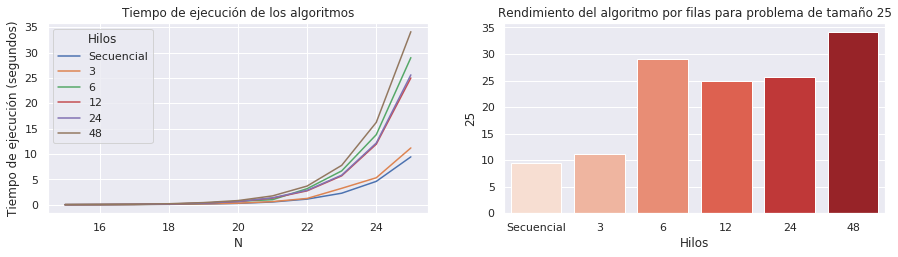

In [84]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(15, 3.5)


plot = data.plot(ax=ax1)
plot.set_ylabel('Tiempo de ejecución (segundos)')
plot.set_title('Tiempo de ejecución de los algoritmos')

plt.savefig('charts/powerset-perf.png')

row_plt = sns.barplot(x=data.iloc[-1].index, y=data.iloc[-1],
                      palette="Reds", ax=ax2)
row_plt.set_title('Rendimiento del algoritmo por filas para problema de tamaño 25')

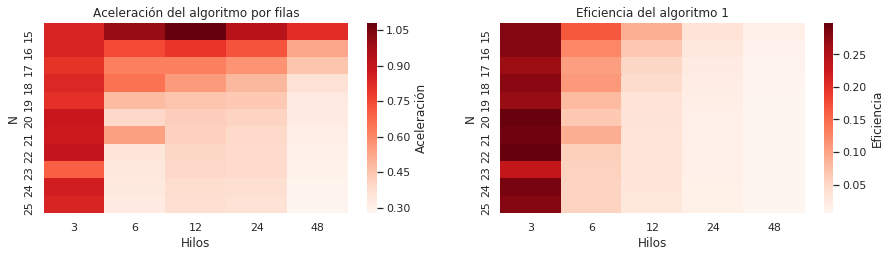

In [88]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(15, 3.5)
accel =  (1 / par_data).mul(seq_data['Secuencial'], axis=0)
n_threads = par_data.columns

efficiency = accel / n_threads

sns.heatmap(accel, cbar_kws={'label': 'Aceleración'}, ax=ax1,
            cmap='Reds').set_title("Aceleración del algoritmo por filas")

sns.heatmap(efficiency, cmap='Reds', cbar_kws={'label': 'Eficiencia'},
            ax=ax2).set_title("Eficiencia del algoritmo")

fig.savefig('charts/stars_accel.png', dpi=500)